# **Data Cleaning**

## Data Description

- hotel : Hotel type (Resort Hotel dan City Hotel)
- is_canceled : Canceled = 1, Not canceled = 0
- lead_time : Number of days between booking time with arrival time
- arrival_date_year : arrival year
- arrival_date_month : arrival month
- arrival_date_week_number : arrival week
- arrival_date_day_of_month : arrival date
- stays_in_weekend_nights : number of nights the guest booked the hotel during Saturday - Sunday
- stays_in_weekdays_nights : number of nights the guest booked the hotel during Monday - Friday
- adults : number of adults
- children : number of children
- babies : number of babies
- meal : meal type
- city : city of origin the guest
- market_segment : market segment
- distribution_channel : channel of distribution
- is_repeated_guest : Yes = 1 0, No = 0
- previous_cancellations : number of cancelled bookings
- previous_bookings_not_canceled : number of no cancelled bookings
- booking_changes : number of changes made by the guest before final booking
- deposit_type : type of deposit made by the guest
- agent : code of agen 
- company : code of company
- days_in_waiting_list : number of days the booking was in the waiting list before it was confirmed
- customer_type : type of booking
- adr : average daily rate for the booking
- required_car_parking_spaces : number of car parking spaces that required by the guest
- total_of_special_requests : number of special requests made by the guest
- reservation_status : status of reservation made by the guest

**Pada case ini saya menambahkan beberapa asumsi**

- Usia babies adalah < 6 tahun, dan usia children adalah 6-18 tahun atau usia anak sekolah
- Tamu kategori babies harus ada pendamping minimal 1 adults dan pemesanan atas nama si pendamping 
- Jika tamu babies dan children menginap bersama harus ada pendamping minimal 1 adults

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


# Ignore warning
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- Kolom dan tipe data sudah sesuai dengan inputan
- Namun ada beberapa kolom numerik yang seharusnya kategorik yaitu 'is_canceled', 'is_repeated_guest', 'agent', 'company'. Oleh karena terlebih dahulu untuk diubah
- Setelah hal tersebut akan dipisahkan antara kolom numerik dan kategorik

In [5]:
df[['is_canceled', 'is_repeated_guest', 'agent', 'company']]=df[['is_canceled', 'is_repeated_guest', 'agent', 'company']].astype(np.object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
#memisahkan kolom numerik dan kategorik
num = df.select_dtypes(include=[np.number])
cat = df.select_dtypes(exclude=[np.number])

- Setelah dicek kembali, kolom-kolom numerik namun seharusnya adalah kolom kategorik telah dipisahkan 

## Descriptive Statistic

In [8]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.describe(include='object')

,hotel,is_canceled,arrival_date_month,meal,city,market_segment,distribution_channel,is_repeated_guest,deposit_type,agent,company,customer_type,reservation_status
count,119390,119390,119390,119390,118902,119390,119390,119390,119390,103050.0,6797.0,119390,119390
unique,2,2,12,5,177,8,5,2,3,333.0,352.0,4,3
top,City Hotel,0,October,Breakfast,Kota Denpasar,Online TA,TA/TO,0,No Deposit,9.0,40.0,Personal,Check-Out
freq,79330,75166,13877,92310,48590,56477,97870,115580,104641,31961.0,927.0,89613,75166


In [10]:
df[df['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
14969,Resort Hotel,0,195,2019,May,10,5,4,6,2,0.0,0,Breakfast,Kabupaten Bangka,Groups,Direct,1,0,2,2,No Deposit,273.0,NaN,0,Family,-6.38,0,0,Check-Out


In [11]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

**Menambahkan kolom jumlah tamu yang menginap untuk setiap pemesanan**

In [12]:
df['total_of_guest'] = df['adults'] + df['children'] + df['babies']

In [13]:
total_guest = df.groupby(['total_of_guest']).agg({'total_of_guest':'count'})
total_guest

,total_of_guest
total_of_guest,
0.0,180
1.0,22581
2.0,82048
3.0,10494
4.0,3929
5.0,137
6.0,1
10.0,2
12.0,2


- Baris yang memiliki total tamu = 0 akan dihapus
- Baris adults=0, Babies dan children lebih dari 0 akan dihapus karena ada babies yang harus ada pendamping minimal 1 adults
- Baris adults=0, children=0 dan babies>1 akan dihapus, karena babies tanpa pendamping minimal 1 adults

In [14]:
#run codingan ini sekali
#menghapus total tamu =0
df = df[df['total_of_guest']>0]

#menghapus adults=0, babies>0 dan children>0
df = df[~((df['adults']==0) & (df['babies']>0) & (df['children']>0))]

#menghapus adults=0, children=0, babies> 0

df = df[~((df['adults']==0) & (df['babies']>0) & (df['children']==0))]

In [15]:
df.shape

(119203, 30)

In [16]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_of_guest
count,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000,119203.000000
mean,104.114888,2018.156531,27.162840,15.799124,0.927074,2.499199,1.859240,0.103999,0.007936,0.087196,0.137102,0.218786,2.321351,101.971785,0.062557,0.571454,1.971175
std,106.876021,0.707458,13.601135,8.781088,0.995127,1.897122,0.575117,0.398733,0.097385,0.844943,1.498181,0.638497,17.598510,50.433394,0.245366,0.792863,0.718873
min,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000
25%,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,2.000000
50%,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.950000,0.000000,0.000000,2.000000
75%,161.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2.000000
max,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000,55.000000


**Kesesuain data :**

- Pada kolom adr nilai minimumnya adalah negatif dan setelah dilakukan pengecekan ada satu baris dimana adr nya negatif, oleh karena itu akan dihapus, karena rata-rata booking tidak mungkin negatif
- Pada statistic descriptive kolom kategorik secara keseluruhan kesesuaian datanya sudah tepat
- Pada kolom tambahan yaitu total_of_guest dan beberapa kondisi lain seperti jumlah tamu adults, babies dan children sudah sesuai
- Kemudian pada jumlah kelas meal undifined akan diganti dengan 'No Meal'

In [17]:
df = df.drop(df[df['adr']<0].index)
df[df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_of_guest


In [18]:
df['meal'] = np.where(df['meal']=='Undefined', 'No Meal', df['meal'])
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

## Cek Missing Value

In [19]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               0
babies                                 0
meal                                   0
city                                 478
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16278
company                           112434
days_in_waiting_list                   0
customer_type   

- Ada kolom yang memiliki Missing Value yaitu kolom 'city, 'agent', 'company, dan 'children'

In [20]:
df_na = pd.DataFrame(df.isnull().sum().sort_values(ascending=False).reset_index())
df_na.columns = ['Kolom', 'Jumlah Missing Value']
df_na['Persentase Missing Value'] = round((df_na['Jumlah Missing Value']/ len(df)*100),5).astype(str) + '%'
df_na[df_na['Jumlah Missing Value'] > 0]

,Kolom,Jumlah Missing Value,Persentase Missing Value
0,company,112434,94.32224%
1,agent,16278,13.65581%
2,city,478,0.401%


In [21]:
df['company'].unique()

array([nan, 110.0, 113.0, 270.0, 178.0, 240.0, 154.0, 144.0, 307.0, 268.0,
       59.0, 204.0, 312.0, 318.0, 94.0, 274.0, 174.0, 195.0, 223.0, 317.0,
       281.0, 118.0, 53.0, 286.0, 12.0, 47.0, 324.0, 342.0, 373.0, 371.0,
       86.0, 82.0, 218.0, 88.0, 31.0, 397.0, 392.0, 405.0, 331.0, 367.0,
       20.0, 83.0, 416.0, 51.0, 395.0, 102.0, 34.0, 84.0, 360.0, 394.0,
       457.0, 382.0, 461.0, 478.0, 112.0, 486.0, 421.0, 9.0, 308.0, 135.0,
       224.0, 504.0, 269.0, 356.0, 498.0, 390.0, 513.0, 203.0, 263.0,
       477.0, 521.0, 169.0, 515.0, 445.0, 337.0, 251.0, 428.0, 292.0,
       388.0, 130.0, 250.0, 355.0, 254.0, 543.0, 531.0, 528.0, 62.0,
       120.0, 42.0, 81.0, 116.0, 530.0, 103.0, 39.0, 16.0, 92.0, 61.0,
       501.0, 165.0, 291.0, 290.0, 43.0, 325.0, 192.0, 108.0, 200.0,
       465.0, 287.0, 297.0, 490.0, 482.0, 207.0, 282.0, 437.0, 225.0,
       329.0, 272.0, 28.0, 77.0, 338.0, 72.0, 246.0, 319.0, 146.0, 159.0,
       380.0, 323.0, 511.0, 407.0, 278.0, 80.0, 403.0, 399.0, 1

In [22]:
df['agent'].unique()

array([nan, 304.0, 240.0, 303.0, 15.0, 241.0, 8.0, 250.0, 115.0, 5.0,
       175.0, 134.0, 156.0, 243.0, 242.0, 3.0, 105.0, 40.0, 147.0, 306.0,
       184.0, 96.0, 2.0, 127.0, 95.0, 146.0, 9.0, 177.0, 6.0, 143.0,
       244.0, 149.0, 167.0, 300.0, 171.0, 305.0, 67.0, 196.0, 152.0,
       142.0, 261.0, 104.0, 36.0, 26.0, 29.0, 258.0, 110.0, 71.0, 181.0,
       88.0, 251.0, 275.0, 69.0, 248.0, 208.0, 256.0, 314.0, 126.0, 281.0,
       273.0, 253.0, 185.0, 330.0, 334.0, 328.0, 326.0, 321.0, 324.0,
       313.0, 38.0, 155.0, 68.0, 335.0, 308.0, 332.0, 94.0, 348.0, 310.0,
       339.0, 375.0, 66.0, 327.0, 387.0, 298.0, 91.0, 245.0, 385.0, 257.0,
       393.0, 168.0, 405.0, 249.0, 315.0, 75.0, 128.0, 307.0, 11.0, 436.0,
       1.0, 201.0, 183.0, 223.0, 368.0, 336.0, 291.0, 464.0, 411.0, 481.0,
       10.0, 154.0, 468.0, 410.0, 390.0, 440.0, 495.0, 492.0, 493.0,
       434.0, 57.0, 531.0, 420.0, 483.0, 526.0, 472.0, 429.0, 16.0, 446.0,
       34.0, 78.0, 139.0, 252.0, 270.0, 47.0, 114.0, 301.

In [23]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [24]:
print(df['city'].nunique())
print(df['city'].mode())
df['city'].unique()

177
0    Kota Denpasar
Name: city, dtype: object


array(['Kota Denpasar', 'Kabupaten Bangka', 'Kabupaten Sleman',
       'Kota Batu', 'Kota Malang', 'Kota Yogyakarta', nan,
       'Kabupaten Tangerang', 'Kota Semarang', 'Kota Serang',
       'Kota Tangerang', 'Kota Bogor', 'Kabupaten Bandung',
       'Kabupaten Magelang', 'Kabupaten Sumedang', 'Kota Jakarta Timur',
       'Kabupaten Purwakarta', 'Kabupaten Kepulauan Seribu',
       'Kabupaten Belitung', 'Kota Jakarta Pusat', 'Kota Jakarta Selatan',
       'Kota Surabaya', 'Kota Jakarta Utara', 'Kota Gorontalo',
       'Kota Jambi', 'Kota Jakarta Barat', 'Kota Bengkulu',
       'Kabupaten Bandung Barat', 'Kabupaten Bekasi', 'Kabupaten Bogor',
       'Kabupaten Ciamis', 'Kabupaten Cianjur', 'Kabupaten Cirebon',
       'Kota Cimahi', 'Kabupaten Indramayu', 'Kabupaten Karawang',
       'Kabupaten Kuningan', 'Kabupaten Majalengka', 'Kabupaten Serang',
       'Kota Pangkal Pinang', 'Kabupaten Subang', 'Kabupaten Sukabumi',
       'Kabupaten Garut', 'Kabupaten Tasikmalaya', 'Kota Bandung',
 

### Handling Missing Value 

- Kolom Company akan didrop karena missing value > 90%
- Missing Value pada kolom Agent akan direplace dengan "Other Agent"
- Missing Value pada kolom Children akan direplace/diisi dengan 0 yang berarti number of children=0
- Missing Value pada kolom City akan diisi dengan "Other City"

In [25]:
#run kodingan ini sekali
#handling company columns
df = df.drop('company', axis =1)

In [26]:
#handling agent
df['agent'].fillna('Other Agent', inplace = True)

#handling Children
df['children'].fillna(value = 0, inplace = True)

#handling city 
df['city'].fillna('Other Agent', inplace = True)

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

## Cek Duplikat Data 

In [27]:
df.duplicated().sum()

33257

- Ada 33257 baris data yang duplikat, oleh karena itu akan dihapus dari dataset

### Handling Duplicat data 

In [28]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [29]:
df.shape

(85945, 29)

# **Data Visualization**

## **Task 2**

#### Perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel

In [30]:
df_hotel_agr = df.groupby(['arrival_date_year','arrival_date_month','hotel'])['customer_type'].count().reset_index()
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_hotel_agr['arrival_date_month'] = pd.Categorical(df_hotel_agr['arrival_date_month'], categories=months, ordered=True)
df_hotel_agr = df_hotel_agr.pivot_table(index=['arrival_date_year','arrival_date_month'], columns = 'hotel', values = 'customer_type')
df_hotel_agr

hotel                                 City Hotel  Resort Hotel
arrival_date_year arrival_date_month                          
2017              January                    761           844
                  February                   996           947
                  September                  373          1275
                  October                   1050          1344
                  November                  1539          1135
                  December                  1453          1109
2018              January                   2114          1179
                  February                  1969          1147
                  March                     1013           815
                  April                     1625          1134
                  May                       2351          1442
                  June                      2384          1331
                  July                      2299          1403
                  August                    2221          1218
                  September                 2458          1358
                  October                   2782          1598
                  November                  2515          1259
                  December                  2595          1549
2019              March                     1679          1117
                  April                     1921          1339
                  May                       2447          1170
                  June                      2643          1445
                  July                      3034          1494
                  August                    2697          1511
                  September                 2842          1664
                  October                   2652          1705

#### Normalisasi data dan mengurutkan data berdasarkan bulan

- Melakukan normalisasi data karena hanya bulan September dan Oktober yang setiap tahunnya ada dalam 3 tahun terakhir, sehingga akan dibuat rata-rata perbulan 

In [31]:
df_hotel = df.groupby(['arrival_date_year','arrival_date_month','hotel']).agg({'arrival_date_year':['count']}).reset_index()
df_hotel.columns = ['year', 'month', 'hotel','count']
df_hotel.head()

,year,month,hotel,count
0,2017,December,City Hotel,1453
1,2017,December,Resort Hotel,1109
2,2017,February,City Hotel,996
3,2017,February,Resort Hotel,947
4,2017,January,City Hotel,761


In [32]:
df_hotel_new = df_hotel[['month', 'hotel','count']]
df_hotel_new = df_hotel_new.groupby(['month','hotel']).agg({'count':'mean'}).reset_index()

In [33]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_hotel_new['month'] = pd.Categorical(df_hotel_new['month'], categories=months, ordered=True)

In [34]:
df_hotel_new = df_hotel_new.sort_values(by='month', ascending=True)
df_hotel_new.columns = ['month', 'hotel', 'average_of_booking']
df_hotel_new.head()

,month,hotel,average_of_booking
8,January,City Hotel,1437.5
9,January,Resort Hotel,1011.5
6,February,City Hotel,1482.5
7,February,Resort Hotel,1047.0
15,March,Resort Hotel,966.0


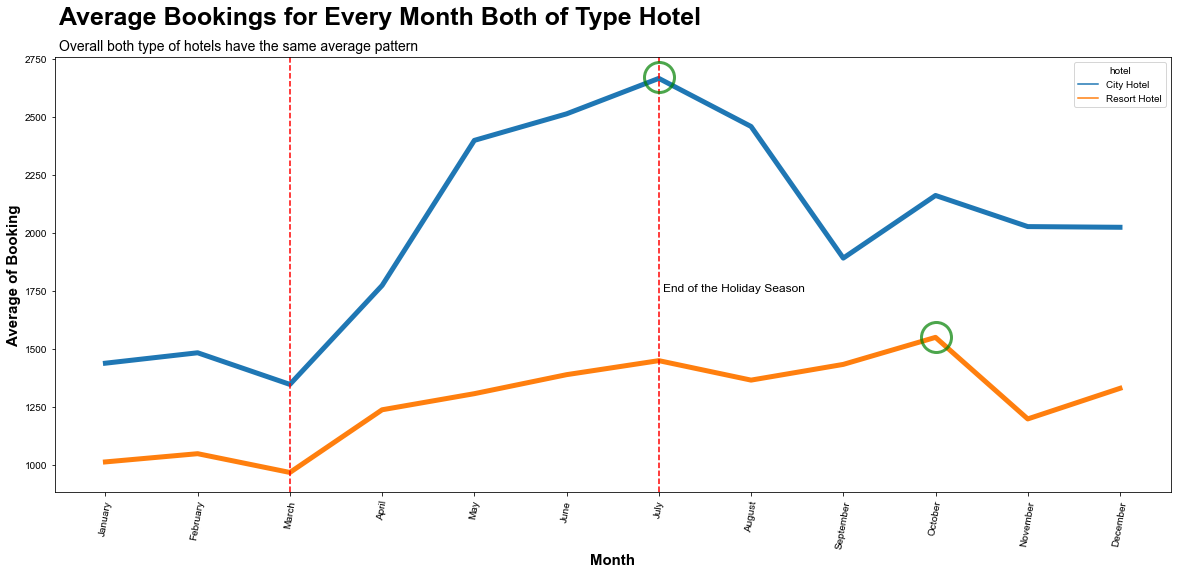

In [35]:
import datetime
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.lineplot(x=df_hotel_new['month'], y=df_hotel_new['average_of_booking'], hue = df_hotel_new['hotel'], linewidth=5.0)
plt.axvline('March', color='red', linestyle='--')
plt.axvline('July', color='red', linestyle='--')
plt.text(x=-0.5,y=2900,s="Average Bookings for Every Month Both of Type Hotel",fontsize=25,weight='bold')
plt.text(x=-0.5,y=2790,s="Overall both type of hotels have the same average pattern ",fontsize=14)
ax.plot('July', 2672, 'o', mew=3, ms=30, mec='g', mfc='none', alpha=.7)
ax.plot('October', 1549, 'o', mew=3, ms=30, mec='g', mfc='none', alpha=.7)
plt.text(x=6.05,y=1750,s='End of the Holiday Season',fontsize=12)
plt.xticks(rotation = 80)
ax.set_xlabel('Month',fontsize = 15, weight='bold')
ax.set_ylabel('Average of Booking',fontsize = 15, weight='bold')
sns.set_style("dark")
# sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.show()

- Pada bulan Maret hingga Juli, rata-rata booking dari kedua jenis hotel terus mengalami kenaikan karena pada bulan-bulan tersebut menjelang musim liburan (libur sekolah dan lebaran). Namun setelah bulan Juli mengalami penurunan, yaitu tipe 'City Hotel' mengalami penurunan hingga bulan September dan tipe 'Resort Hotel' mengalami penurunan hingga bulan Agustus. Hal ini dikarenakan musim liburan telah usai.
- Rata-rata booking tertinggi tipe 'City Hotel' terjadi pada bulan Juli, sedangkan pada tipe 'Resort Hotel' terjadi pada bulan October.

## **Task 3**

**Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates**

In [48]:
df_stay = df[['hotel','is_canceled','stays_in_weekend_nights','stays_in_weekdays_nights']]
df_stay['total_stay'] = df_stay['stays_in_weekend_nights'] + df_stay['stays_in_weekdays_nights']
df_stay['is_canceled_new'] = np.where(df_stay['is_canceled'] == 0, 'No', 'Yes')
df_stay = df_stay.drop('is_canceled', axis=1)

df_stay.head()

,hotel,stays_in_weekend_nights,stays_in_weekdays_nights,total_stay,is_canceled_new
0,Resort Hotel,0,0,0,No
1,Resort Hotel,0,0,0,No
2,Resort Hotel,0,1,1,No
3,Resort Hotel,0,1,1,No
4,Resort Hotel,0,2,2,No


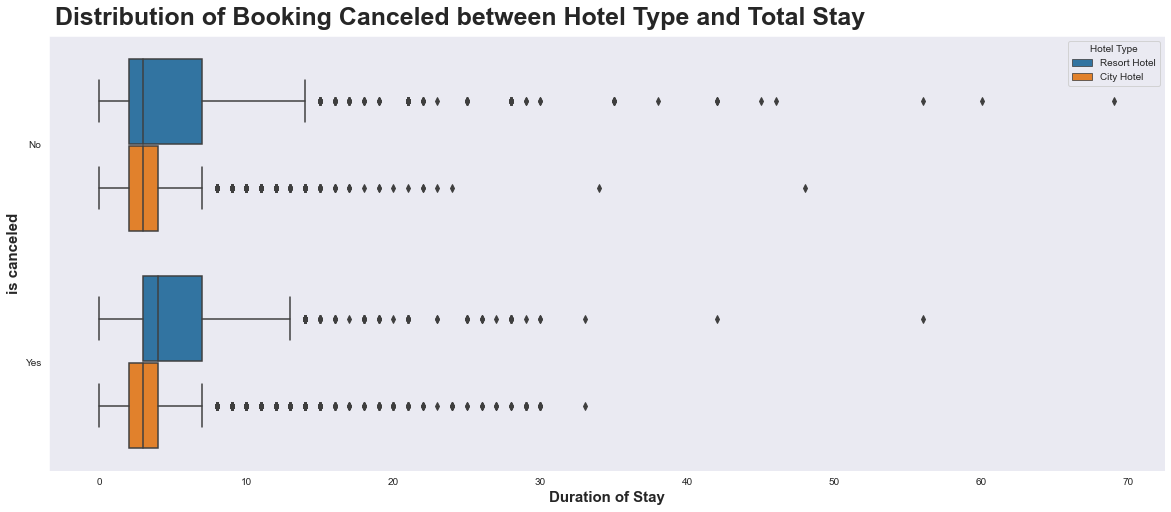

In [49]:
plt.figure(figsize = (20,8))
fte_graph = sns.boxplot(x='total_stay', y='is_canceled_new', hue = 'hotel', data=df_stay)
plt.text(x=-3,y=-0.55,s="Distribution of Booking Canceled between Hotel Type and Total Stay",fontsize=25,weight='bold')
plt.xlabel('Duration of Stay',fontsize = 15, weight='bold')
plt.ylabel('is canceled',fontsize = 15, weight='bold')
plt.legend(title='Hotel Type')
plt.show()

- Berdasarkan boxplot tersebut, untuk duration of stay yang nilainya > 31 hari akan diganti 32 hari atau '>31'

In [50]:
df_stay = df[['hotel','is_canceled','stays_in_weekend_nights','stays_in_weekdays_nights']]
df_stay['total_stay'] = df_stay['stays_in_weekend_nights'] + df_stay['stays_in_weekdays_nights']
df_stay['is_canceled_new'] = np.where(df_stay['is_canceled'] == 0, 'No', 'Yes')
df_stay = df_stay.drop('is_canceled', axis=1)
df_baru1 = df_stay[['hotel','total_stay','is_canceled_new']]
df_baru1['dos'] = np.where(df_stay['total_stay']>31,32, df_stay['total_stay'])


df_baru1= df_baru1.groupby(['hotel','is_canceled_new','dos']).agg({'hotel':['count']}).reset_index()
df_baru1.columns = ['hotel','is_canceled_new','dos','count']
df_baru1
df_pivot = df_baru1.pivot_table(index=['dos'], columns = ['hotel','is_canceled_new'], values = 'count').reset_index()
df_pivot.columns=['dos','city_no','city_yes','resort_no','resort_yes']
df_pivot = df_pivot.sort_values(by ='dos', ascending=True)
df_pivot['dos_new'] = np.where(df_pivot['dos']==32,'>31',df_pivot['dos'])
df_pivot.isnull().sum()

dos           0
city_no       6
city_yes      0
resort_no     4
resort_yes    2
dos_new       0
dtype: int64

In [51]:
df_pivot.tail(10)

,dos,city_no,city_yes,resort_no,resort_yes,dos_new
22,22,2.0,4.0,6.0,NaN,22
23,23,1.0,1.0,1.0,2.0,23
24,24,1.0,5.0,NaN,NaN,24
25,25,NaN,2.0,7.0,5.0,25
26,26,NaN,3.0,NaN,3.0,26
27,27,NaN,3.0,NaN,1.0,27
28,28,NaN,3.0,22.0,9.0,28
29,29,NaN,10.0,2.0,1.0,29
30,30,NaN,7.0,2.0,2.0,30
31,32,2.0,1.0,14.0,3.0,>31


In [52]:
df_pivot['city_no'].fillna(value = 0, inplace = True)
df_pivot['resort_no'].fillna(value = 0, inplace = True)
df_pivot['resort_yes'].fillna(value = 0, inplace = True)
df_pivot['City Hotel'] = df_pivot['city_yes']/(df_pivot['city_no']+df_pivot['city_yes'])*100 #Percentage cancel city hotel
df_pivot['Resort Hotel'] = df_pivot['resort_yes']/(df_pivot['resort_no']+df_pivot['resort_yes'])*100 #Percentage cancel resort hotel
df_pivot.head()

,dos,city_no,city_yes,resort_no,resort_yes,dos_new,City Hotel,Resort Hotel
0,0,218.0,13.0,345.0,10.0,0,5.627706,2.816901
1,1,7838.0,2258.0,5947.0,852.0,1,22.365293,12.531255
2,2,7374.0,3131.0,3829.0,996.0,2,29.804855,20.642487
3,3,9135.0,4182.0,3127.0,1082.0,3,31.403469,25.706819
4,4,6440.0,3059.0,2839.0,1044.0,4,32.203390,26.886428


In [66]:
df_pivot_new = df_pivot[['dos','dos_new','Resort Hotel','City Hotel']]
df_pivot_new = pd.melt(df_pivot_new, id_vars=['dos','dos_new'], var_name="hotel", value_name="cancel rate")
df_pivot_new.head()

,dos,dos_new,hotel,cancel rate
0,0,0,Resort Hotel,2.816901
1,1,1,Resort Hotel,12.531255
2,2,2,Resort Hotel,20.642487
3,3,3,Resort Hotel,25.706819
4,4,4,Resort Hotel,26.886428


**Plot rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel**

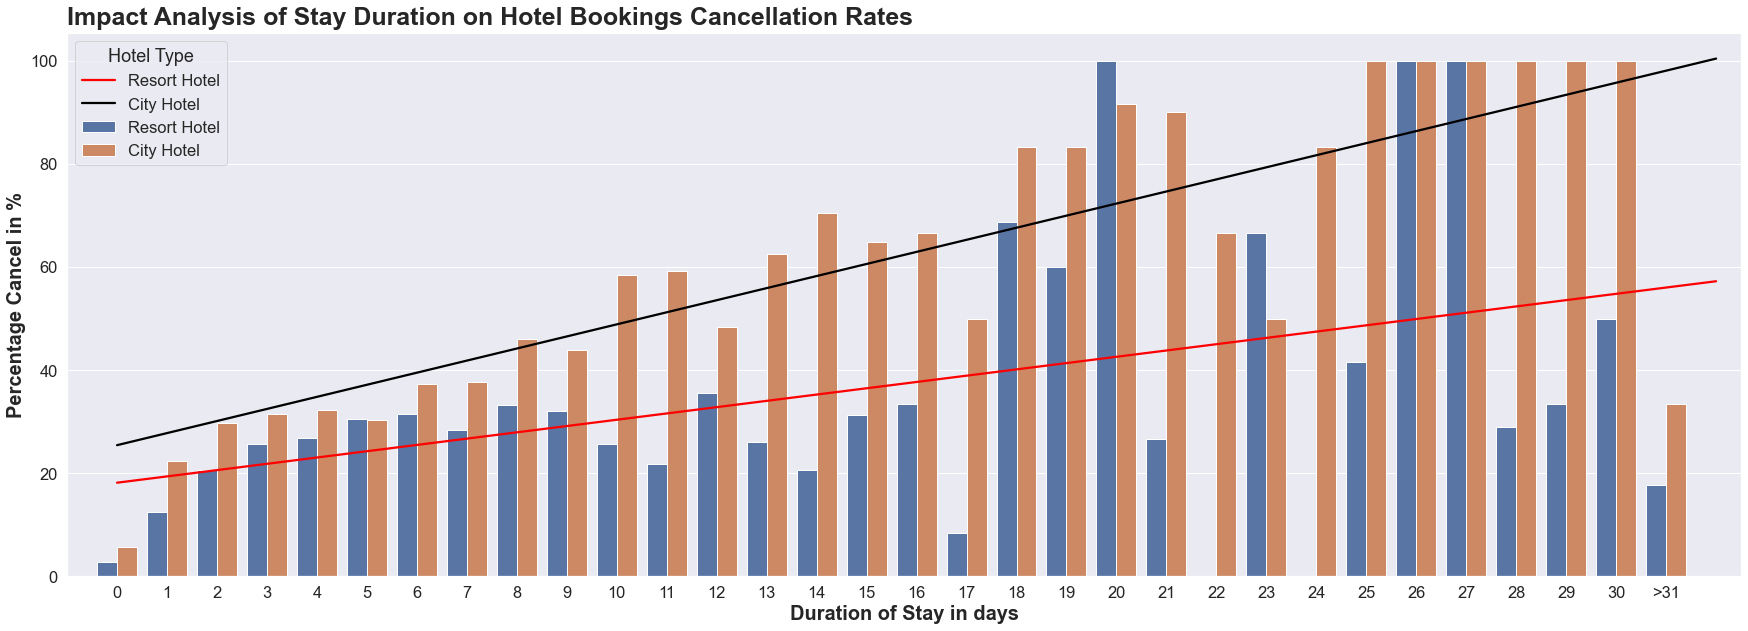

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
sns.barplot(x='dos_new', y='cancel rate', hue='hotel', data=df_pivot_new)
sns.regplot(x=df_pivot['dos'], y=df_pivot['Resort Hotel'],ci=None,scatter= False,label='Resort Hotel',color='red')
sns.regplot(x=df_pivot['dos'], y=df_pivot['City Hotel'],ci=None,scatter= False,label='City Hotel',color='black')
plt.text(x=-1,y=107,s="Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates",fontsize=25,weight='bold')
plt.xlabel("Duration of Stay in days", fontsize = 20, weight='bold')
plt.ylabel("Percentage Cancel in %", fontsize = 20, weight='bold')
plt.legend(title='Hotel Type')
plt.xlim(-1,32.5)
plt.show()

- Semakin lama durasi menginap semakin besar juga persentase pembatalannya baik tipe ‘City Hotel’ maupun ‘Resort Hotel’
- Berdasarkan grafik tersebut, secara keseluruhan pembatalan booking berdasarkan durasi menginap pada tipe ‘City Hotel’ persentasenya lebih tinggi dibandingkan dengan ‘Resort Hotel’


## **Task 4**

**Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

In [85]:
df_lead = df[['hotel','is_canceled','lead_time']]
df_lead['is_canceled_new'] = np.where(df_lead['is_canceled'] == 0, 'No', 'Yes')
df_lead = df_lead.drop('is_canceled', axis=1)
df_lead.head()

,hotel,lead_time,is_canceled_new
0,Resort Hotel,342,No
1,Resort Hotel,737,No
2,Resort Hotel,7,No
3,Resort Hotel,13,No
4,Resort Hotel,14,No


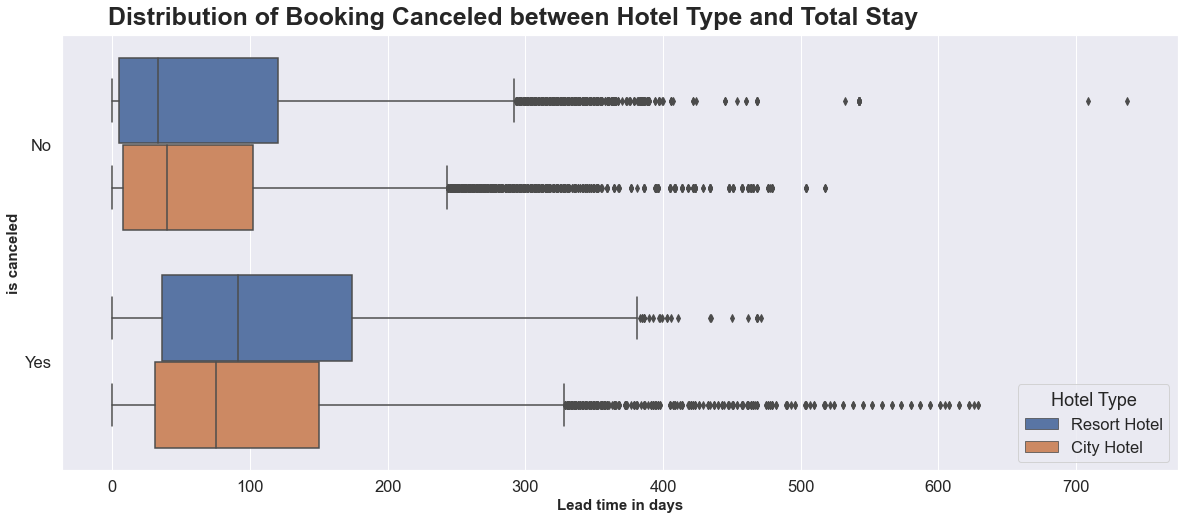

In [86]:
plt.figure(figsize = (20,8))
fte_graph = sns.boxplot(x='lead_time', y='is_canceled_new', hue = 'hotel', data=df_lead)
plt.text(x=-3,y=-0.55,s="Distribution of Booking Canceled between Hotel Type and Total Stay",fontsize=25,weight='bold')
plt.xlabel('Lead time in days',fontsize = 15, weight='bold')
plt.ylabel('is canceled',fontsize = 15, weight='bold')
plt.legend(title='Hotel Type')
plt.show()

In [87]:
import math
bin = []
sort =[]

for i,y in df_lead.iterrows():
    if df_lead['lead_time'][i]>360:
        bulan = '> 360'
        urutan = 13
    elif df_lead['lead_time'][i]<31:
        bulan = '0-30'
        urutan = 1
    else:
        bulan = str((math.trunc((df_lead['lead_time'][i]-1)/30)*30)+1) + '-' + str((math.trunc((df_lead['lead_time'][i]-1)/30)*30)+30)
        urutan = (math.trunc((df_lead['lead_time'][i]-1)/30))+1
    bin.append(bulan)
    sort.append(urutan)
bin
sort
df_lead['lead_time_bin']=bin
df_lead['sort_lead_time_bin']=sort

In [88]:
df_lead = df_lead.sort_values('sort_lead_time_bin',ascending=True)
df_lead.head()

,hotel,lead_time,is_canceled_new,lead_time_bin,sort_lead_time_bin
57693,City Hotel,4,Yes,0-30,1
51588,City Hotel,2,Yes,0-30,1
51592,City Hotel,24,Yes,0-30,1
51606,City Hotel,28,Yes,0-30,1
51608,City Hotel,28,Yes,0-30,1


In [89]:
df_lead= df_lead.groupby(['sort_lead_time_bin','lead_time_bin','hotel','is_canceled_new']).agg({'hotel':['count']}).reset_index()
df_lead.columns = ['sort_lead_time_bin','lead_time_bin','hotel','is_canceled_new','count']
df_lead

,sort_lead_time_bin,lead_time_bin,hotel,is_canceled_new,count
0,1,0-30,City Hotel,No,16201
1,1,0-30,City Hotel,Yes,3932
2,1,0-30,Resort Hotel,No,12401
3,1,0-30,Resort Hotel,Yes,1697
4,2,31-60,City Hotel,No,5833
5,2,31-60,City Hotel,Yes,2885
6,2,31-60,Resort Hotel,No,3133
7,2,31-60,Resort Hotel,Yes,1292
8,3,61-90,City Hotel,No,4078
9,3,61-90,City Hotel,Yes,2090


In [90]:
df_pivot_lead = df_lead.pivot_table(index=['sort_lead_time_bin','lead_time_bin'], columns = ['hotel','is_canceled_new'], values = 'count').reset_index()
df_pivot_lead.columns = ['sort_lead_time_bin','lead_time_bin','city_no','city_yes','resort_no','resort_yes']

In [91]:
df_pivot_lead['Resort Hotel'] = df_pivot_lead['resort_yes']/(df_pivot_lead['resort_no']+df_pivot_lead['resort_yes'])*100 #percentage cancel of Resort Hotel
df_pivot_lead['City Hotel'] = df_pivot_lead['city_yes']/(df_pivot_lead['city_no']+df_pivot_lead['city_yes'])*100 #percentage cancel of City Hotel
df_pivot_lead

,sort_lead_time_bin,lead_time_bin,city_no,city_yes,resort_no,resort_yes,Resort Hotel,City Hotel
0,1,0-30,16201,3932,12401,1697,12.037168,19.530125
1,2,31-60,5833,2885,3133,1292,29.197740,33.092452
2,3,61-90,4078,2090,2129,929,30.379333,33.884565
3,4,91-120,3032,1684,1594,798,33.361204,35.708227
4,5,121-150,2290,1312,1362,687,33.528551,36.424209
5,6,151-180,1853,1170,1531,639,29.447005,38.703275
6,7,181-210,1266,837,1038,526,33.631714,39.800285
7,8,211-240,816,568,847,400,32.076985,41.040462
8,9,241-270,441,414,522,315,37.634409,48.421053
9,10,271-300,308,327,406,183,31.069610,51.496063


In [98]:
df_pivot_lead_new = df_pivot_lead[['sort_lead_time_bin','lead_time_bin','Resort Hotel','City Hotel']]
df_pivot_lead_new = pd.melt(df_pivot_lead_new, id_vars=["sort_lead_time_bin","lead_time_bin"], var_name="hotel", value_name="cancel rate")
df_pivot_lead_new = df_pivot_lead_new.sort_values('sort_lead_time_bin', ascending=True)
df_pivot_lead_new

,sort_lead_time_bin,lead_time_bin,hotel,cancel rate
0,1,0-30,Resort Hotel,12.037168
13,1,0-30,City Hotel,19.530125
1,2,31-60,Resort Hotel,29.197740
14,2,31-60,City Hotel,33.092452
2,3,61-90,Resort Hotel,30.379333
15,3,61-90,City Hotel,33.884565
3,4,91-120,Resort Hotel,33.361204
16,4,91-120,City Hotel,35.708227
4,5,121-150,Resort Hotel,33.528551
17,5,121-150,City Hotel,36.424209


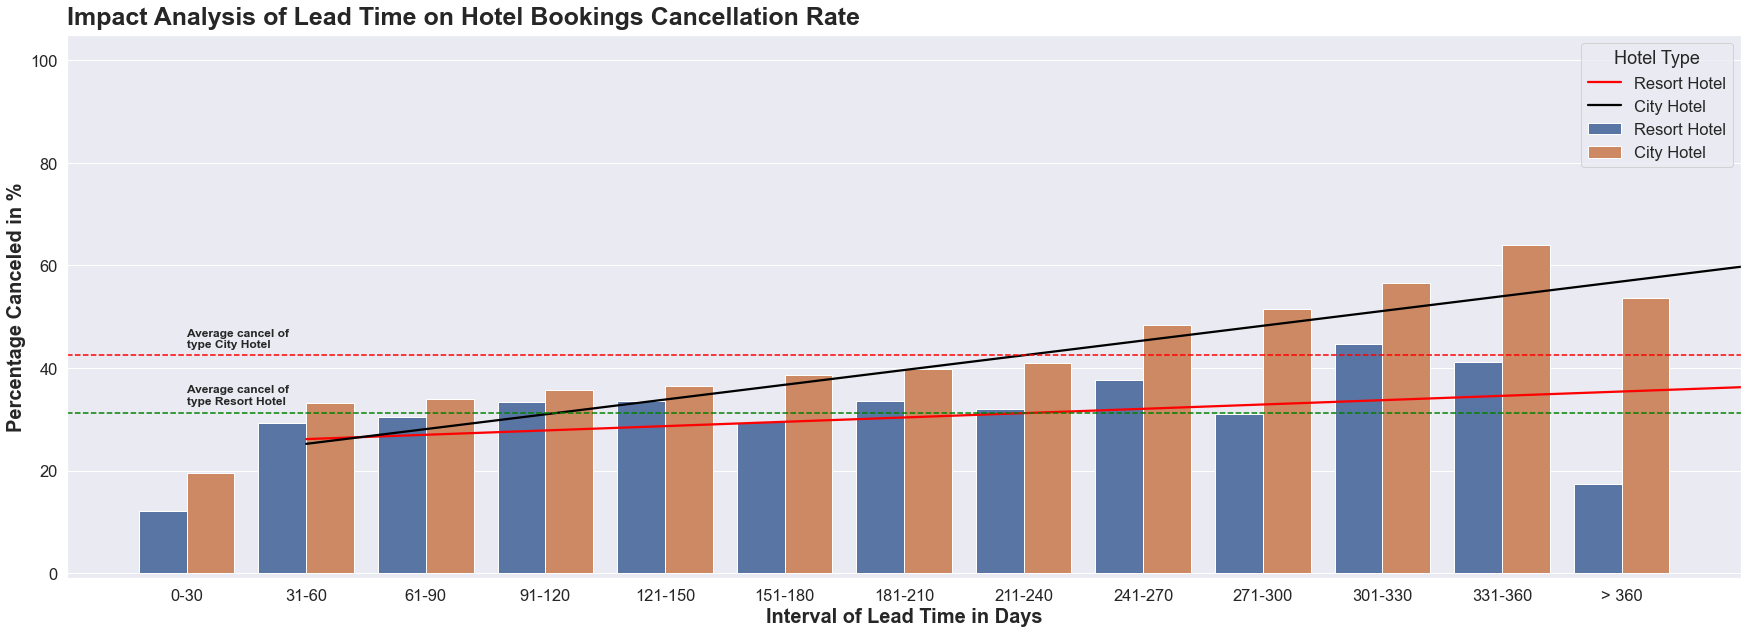

In [103]:
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=1.5)
sns.barplot(x='lead_time_bin', y='cancel rate', hue='hotel', data=df_pivot_lead_new)
sns.regplot(x=df_pivot_lead['sort_lead_time_bin'], y=df_pivot_lead['Resort Hotel'],ci=None,scatter= False,label='Resort Hotel',color='red')
sns.regplot(x=df_pivot_lead['sort_lead_time_bin'], y=df_pivot_lead['City Hotel'],ci=None,scatter= False,label='City Hotel',color='black')
plt.axhline(y = df_pivot_lead_new[df_pivot_lead_new['hotel']=='City Hotel'].mean()[1], color ="red", linestyle ="--")
plt.axhline(y = df_pivot_lead_new[df_pivot_lead_new['hotel']=='Resort Hotel'].mean()[1], color ="green", linestyle ="--")
plt.text(x=-1,y=107,s="Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate",fontsize=25,weight='bold')
plt.text(x=0,y=44,s='Average cancel of \ntype City Hotel',fontsize=12,weight='bold')
plt.text(x=0,y=33,s='Average cancel of \ntype Resort Hotel',fontsize=12,weight='bold')
plt.xlim(-1,13)
plt.ylim(-1,105)
plt.legend(title='Hotel Type')
plt.xlabel('Interval of Lead Time in Days',fontsize = 20, weight='bold')
plt.ylabel('Percentage Canceled in %',fontsize = 20, weight='bold')

plt.show()

- Berdasarkan grafik tersebut, dampak lead time terhadap tingkat pembatalan pemesanan hotel pada tipe City Hotel rata-rata persentase pembatalannya lebih tinggi dibandingkan dengan tipe Resort Hotel. Selain itu semakin lama durasi pada interval lead time, persentase pembatalannya cenderung semakin tinggi pada tipe City Hotel. Sedangkan pada tipe Resort Hotel, semakin lama durasi lead time kenaikan persentase pembatalan tidak terlalu signifikan
- Terkait hal tersebut, hotel dapat membatasi lamanya waktu tunggu maksimal di 480 hari atau sekitar 16 bulan untuk tipe City Hotel yang dihitung dari waktu booking hingga waktu kedatangan tamu dengan tujuan meminimalisir pembatalan akibat lamanya waktu tunggu tersebut
